This project done in a group of 3 people: Vincint, Deven and Zeinab

In [83]:
import pandas as pd
import numpy as np
import nltk
import re
import sklearn
import matplotlib.pyplot as plt
import colorsys
import warnings

from wordcloud import WordCloud

from matplotlib.pyplot import cm
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage, AnnotationBbox)

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

from sklearn.manifold import Isomap
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

warnings.filterwarnings(action='once')
#warnings.filterwarnings("ignore")

In [84]:
#Read data
#df_tot1 = pd.read_csv('movies_1-1000.csv')
#df_tot2 = pd.read_csv('movies_1001-2000.csv')
#df_tot=df_tot1.append(df_tot2,ignore_index=True)

df_tot = pd.read_csv('movies_1-1000.csv')

df = df_tot[df_tot['synopsis']!='\nIt looks like we don\'t have a Synopsis for this title yet. Be the first to contribute! Just click the "Edit page" button at the bottom of the page or learn more in the Synopsis submission guide.\n']

#Drop duplicate titles
df=df.drop_duplicates(subset='title')
df = df.reset_index()
df

,index,title,movie_id,synopsis,rating
0,0,Thor: Love and Thunder,tt10648342,"Gorr, the last of his people, spends his days ...",6.8
1,1,Top Gun: Maverick,tt1745960,"Over three decades after his time at TOPGUN, C...",8.6
2,4,Elvis,tt3704428,"Las Vegas, January 1997.Colonel Tom Parker (To...",7.8
3,5,Jurassic World Dominion,tt8041270,Four years after dinosaurs have been set loose...,5.8
4,8,Doctor Strange in the Multiverse of Madness,tt9419884,"In the Gap Junction, the space between univers...",7.0
...,...,...,...,...,...
835,993,Rock of Ages,tt1336608,"Sherrie takes the bus to Los Angeles, and meet...",5.9
836,994,8 Mile,tt0298203,"It's 1995. Jimmy ""B-Rabbit"" Smith Jr. (Eminem)...",7.1
837,995,Yesterday,tt8079248,In the English coastal town of Lowestoft in th...,6.8
838,996,The Aviator,tt0338751,The Aviator has no opening credits other than ...,7.5


In [85]:
#define TfidfVectorizer
tf = TfidfVectorizer()

#Define x and y
X = df.synopsis.str.replace('.',' ')

#Define stop words to remove
stop_words = set(stopwords.words("english"))
 
#Define lemmatizer
lemmatizer = WordNetLemmatizer()

#Define stemmer
ps = PorterStemmer()

#Clean the reviews (remove numbers, remove stopwords)
X_cleaned = X.str.lower().str.replace('[^a-zA-Z ]', '').apply(lambda x: ' '.join([ps.stem(lemmatizer.lemmatize(word)) for word in x.split() if (word not in (stop_words)) and (len(word)>2)]))

#Define tfidfvectorizer and transform cleaned data (used for NMF)
tf = TfidfVectorizer(max_df=0.85,max_features=5000,min_df=3)
X_cleaned_t = tf.fit_transform(X_cleaned)

#Define CountVectorizer and transform cleaned data (used for LDA)
tf_c = CountVectorizer(max_df=0.85,max_features=5000,min_df=3)
X_cleaned_t_c = tf_c.fit_transform(X_cleaned)

#Isomap for the 3d plot
embedding = Isomap(n_components=3)

#Extract topics from the synopsis
ntopics=30

# Run NMF
nmf = NMF(n_components=ntopics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(X_cleaned_t)
nmf_transform = nmf.transform(X_cleaned_t)

# Run LDA
lda = LatentDirichletAllocation(n_components=ntopics, max_iter=20, learning_method='online', learning_offset=50.,random_state=0).fit(X_cleaned_t_c)
lda_transform = lda.transform(X_cleaned_t_c)

C:\Users\VCDao\AppData\Local\Temp/ipykernel_9564/4282371715.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  X = df.synopsis.str.replace('.',' ')
C:\Users\VCDao\AppData\Local\Temp/ipykernel_9564/4282371715.py:17: FutureWarning: The default value of regex will change from True to False in a future version.
  X_cleaned = X.str.lower().str.replace('[^a-zA-Z ]', '').apply(lambda x: ' '.join([ps.stem(lemmatizer.lemmatize(word)) for word in x.split() if (word not in (stop_words)) and (len(word)>2)]))


In [86]:
#Took this function online, to display topics' main words
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

#My variation of the previous function, output main words from a specific topic
def display_topic_words(model,feature_names,topic_idx,no_top_words):
        topic = model.components_[topic_idx]
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))
        
#Display top 10 words for each topics
no_top_words = 10
tf_feature_names = tf_c.get_feature_names()
tfidf_feature_names = tf.get_feature_names()

#Call function and print results
print('NMF topics:\n')
display_topics(nmf, tfidf_feature_names, no_top_words)
print('\nLDA topics:\n')
display_topics(lda, tf_feature_names, no_top_words)



NMF topics:

Topic 0:
tell get kill say see man go tri ask make
Topic 1:
harri ron hermion voldemort dumbledor hogwart snape hagrid eater draco
Topic 2:
jack barbossa pearl elizabeth alli elli sparrow crew norrington pirat
Topic 3:
peter spiderman spidey gwen parker oscorp goblin octaviu norman web
Topic 4:
david alien ship shaw engin planet crew earth creatur stasi
Topic 5:
sam flynn kelli ray killer frodo clu tommi grace aragorn
Topic 6:
toni stark pepper suit iron rhode maria dicki jarvi susan
Topic 7:
joe bill adrian kathleen soul emili white crop chucki susan
Topic 8:
nick ami donni daisi judi mae rachel danni holli elizabeth
Topic 9:
max mariann vincent brook esther agent dani jacki rig nuclear
Topic 10:
batman bruce superman gotham gordon wayn selina penguin alfr joker
Topic 11:
thor loki asgard odin thano stark hulk banner valkyri jane
Topic 12:
jane smith elena natali rom tempor lizzi darci lester unmarri
Topic 13:
ethan imf lena benji luther julia ilsa lane viru hunt
Topic 14

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

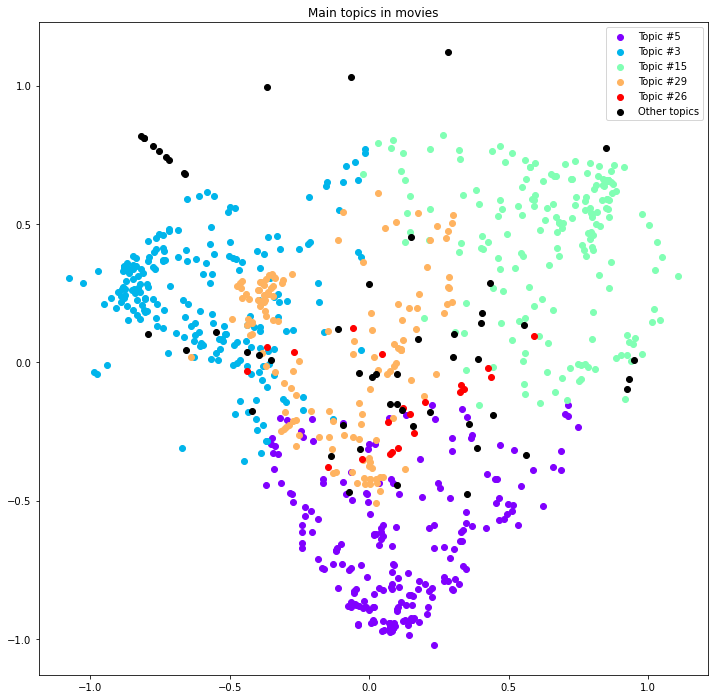

In [87]:
#Create figure and axis
fig, ax = plt.subplots()

#Transform data (topics) to 2D using Isomap (see previous sections)
X_cleaned_t_e = embedding.fit_transform(lda_transform)

#Increase figure size
plt.rcParams["figure.figsize"] = (12,12)

#Get main topic in each movie
tmpmat = []
for p in range(0,len(X_cleaned_t_e)):
    x=np.argmax(lda_transform[p])
    tmpmat.append([x,X_cleaned_t_e[p,0],X_cleaned_t_e[p,1],X_cleaned_t_e[p,2]])

#Add in a dataframe for easier manipulation
movie_topics = pd.DataFrame(tmpmat)

#Get top topics for visualization only
top_topics_n = 5
top_topics=movie_topics[0].value_counts()[0:top_topics_n].index

#THIS PLOTS ALL TOPICS WITH A DIFFERENT COLOR. VISUALIZATION IS NOT GREAT.
#color = iter(cm.rainbow(np.linspace(0, 1, ntopics)))
#for a in range(0,ntopics):
#    c=next(color)
#    plt.scatter(movie_topics[movie_topics[0]==a][1],movie_topics[movie_topics[0]==a][2],c=c,label=a)

#Plot the main topics
color = iter(cm.rainbow(np.linspace(0, 1, top_topics_n)))
for a in top_topics:
    c=next(color)
    plt.scatter(movie_topics[movie_topics[0]==a][1],movie_topics[movie_topics[0]==a][2],c=c,label=''.join(['Topic #',str(a)]))

#Plot the rest in black
plt.scatter(movie_topics[~movie_topics[0].isin(top_topics)][1],movie_topics[~movie_topics[0].isin(top_topics)][2],c='black',label='Other topics')

#Add legend
plt.legend()
plt.title('Main topics in movies')

#Get movies from coordinates on the graph (visually)
for k in range(0,len(X_cleaned_t_e),1):
    movie_name = df.title[k]
    #Harry Potter movies
    if X_cleaned_t_e[k,0]<-0.65 and X_cleaned_t_e[k,1]>0.6:
        1
        #print(k,movie_name)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

Making animation


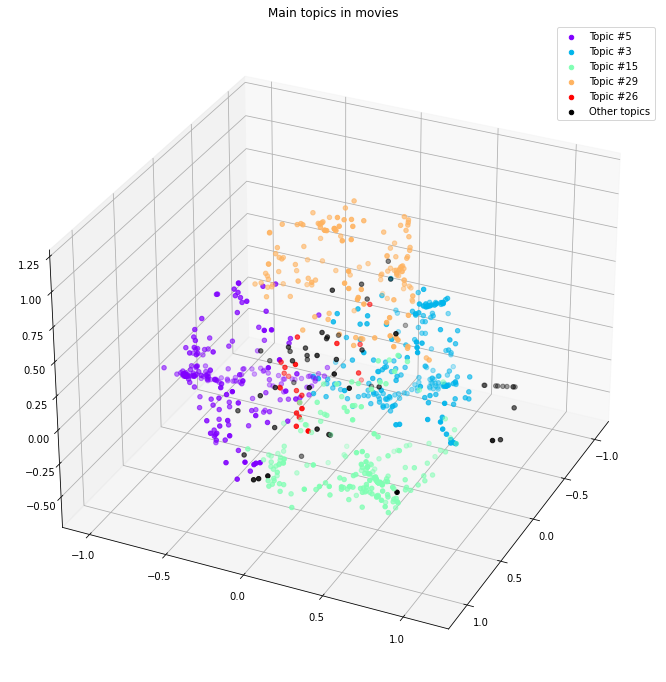

In [7]:
#Create a 3D plot for fun and coolness
#https://stackoverflow.com/questions/51457738/animating-a-3d-scatterplot-with-matplotlib-to-gif-ends-up-empty
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

#Plot the main topics
color = iter(cm.rainbow(np.linspace(0, 1, top_topics_n)))
for a in top_topics:
    c=next(color)
    ax.scatter(movie_topics[movie_topics[0]==a][1],movie_topics[movie_topics[0]==a][2],movie_topics[movie_topics[0]==a][3],c=c,label=''.join(['Topic #',str(a)]))

#Plot the rest in black
ax.scatter(movie_topics[~movie_topics[0].isin(top_topics)][1],movie_topics[~movie_topics[0].isin(top_topics)][2],movie_topics[~movie_topics[0].isin(top_topics)][3],c='black',label='Other topics')

#Add legend
plt.legend()
plt.title('Main topics in movies')

def rotate(angle):
    ax.view_init(azim=angle)

print("Making animation")
rot_animation = animation.FuncAnimation(fig, rotate, frames=np.arange(0, 362, 2), interval=50)

path = 'C:/Users/VCDao/Desktop/rotation_2.gif'
rot_animation.save(path, dpi=80, writer='imagemagick')

ax.view_init(30, 25)
plt.show()


In [13]:
#Getting main 50 words from topic #5
display_topic_words(lda, tf_feature_names, 5 ,50)
print('\n')

#Getting main 50 words from topic #3
display_topic_words(lda, tf_feature_names, 3 ,50)
print('\n')

#Getting main 50 words from topic #15
display_topic_words(lda, tf_feature_names, 15 ,50)
print('\n')

#Getting main 50 words from topic #29
display_topic_words(lda, tf_feature_names, 29 ,50)
print('\n')

#Getting main 50 words from topic #26
display_topic_words(lda, tf_feature_names, 26 ,50)

Topic 5:
kill car tell tri go shoot sam run man john get head come two fire away men say drive call gun look archer give room polic know see ask open sarah name offic arriv use help escap attack anoth turn time leav start he hand face way pull door also


Topic 3:
tell say go ask time call tri man look come get day room home like he two know work woman hous later start night friend give see name meet doesnt run want also talk show next life leav new away walk car make anoth father even first year love begin


Topic 15:
kill ship attack power escap fight forc use order soldier tell destroy help return arriv tri earth two battl time human steve attempt howev team meet world also crew begin men reveal stop head fli war group way first new armi mutant year save us plan caus discov come bodi


Topic 29:
frank alan famili susi kevin father love hous return mari carl mother becom jim home life band time meet show mia tell day ladi reveal marri sebastian give bryan friend ella later new girl t

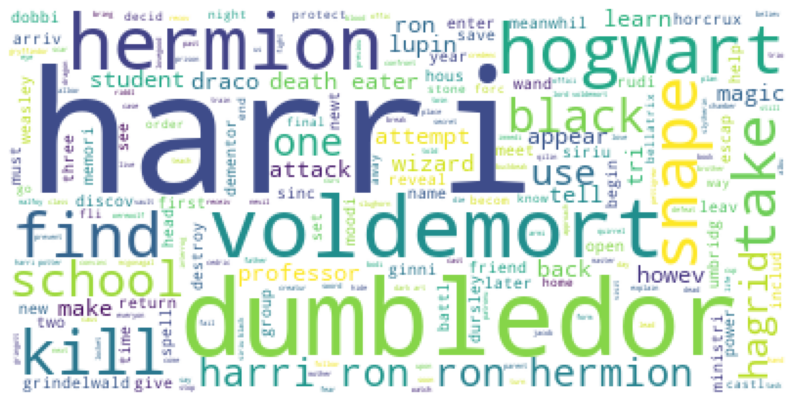

In [88]:
#Word cloud for harry potters (black line on the top left in the graph)
testlist=[20,48,312,382,388,391,467,633,679,696]

wordcloud = WordCloud(background_color = "white").generate(' '.join((X_cleaned[testlist])))
plt.figure( figsize=(14,8) )
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

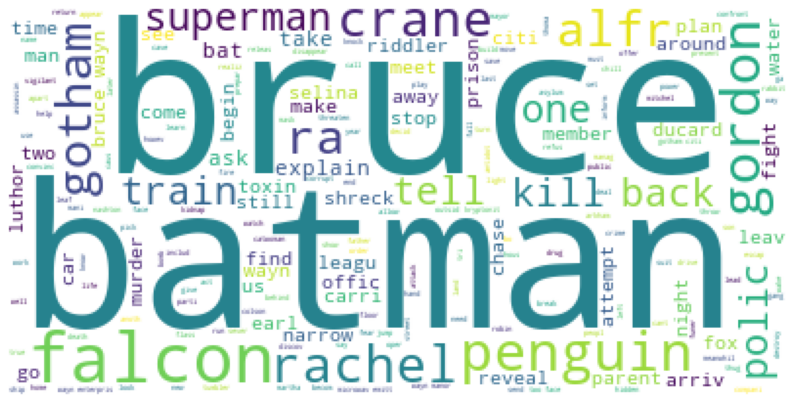

In [114]:
#Word cloud for batmans (black line on the top left in the graph)
testlist=[8,209,340,519,729]

wordcloud = WordCloud(background_color = "white").generate(' '.join((X_cleaned[testlist])))
plt.figure( figsize=(14,8) )
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

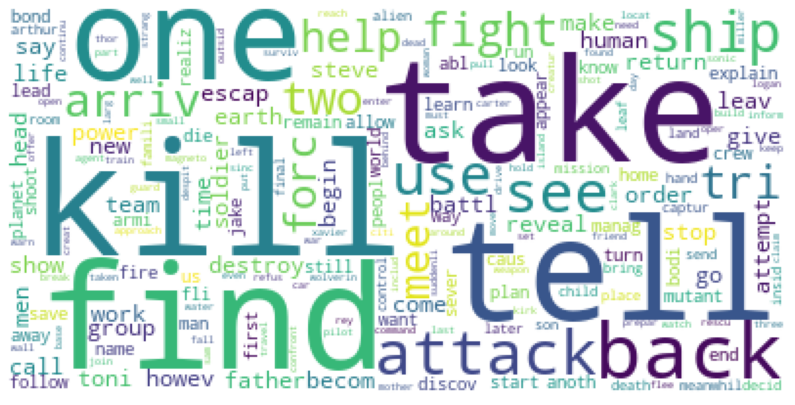

In [98]:
#Wordcloud for a specific topic
topic_number = 15

testlist=list(movie_topics[movie_topics[0]==topic_number].index)
wordcloud = WordCloud(background_color = "white").generate(' '.join((X_cleaned[testlist])))
plt.figure( figsize=(14,8) )
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [81]:
from scipy.spatial.distance import cdist

movieid = 828

point = lda_transform[movieid]
tess = cdist(point[None,], lda_transform)
movie_topics[4] = np.reshape(tess, -1)
suggestions = list(movie_topics[4].sort_values().index[1:10])
print('Suggestions for movies similar to "',df.iloc[movieid].title,'"')
df.iloc[suggestions]['title']


Suggestions for movies similar to " X-Men: The Last Stand "


374    Star Wars: Episode VIII - The Last Jedi
315                                 Armageddon
215                                  Star Trek
624             Godzilla: King of the Monsters
563                   Raya and the Last Dragon
489                          X-Men: Apocalypse
223                                    Dunkirk
727               Snake Eyes: G.I. Joe Origins
630                             X: First Class
Name: title, dtype: object

In [82]:
from scipy.spatial.distance import cdist

movieid = 25

point = lda_transform[movieid]
tess = cdist(point[None,], lda_transform)
movie_topics[4] = np.reshape(tess, -1)
suggestions = list(movie_topics[4].sort_values().index[1:10])
print('Suggestions for movies similar to "',df.iloc[movieid].title,'"')
df.iloc[suggestions]['title']

Suggestions for movies similar to " Jurassic Park "


178    The Lost World: Jurassic Park
389                    Reign of Fire
735         How to Train Your Dragon
79                 The Suicide Squad
755              The Bourne Identity
509                 Army of the Dead
749                         Geostorm
359                        Get Smart
254                     Transformers
Name: title, dtype: object

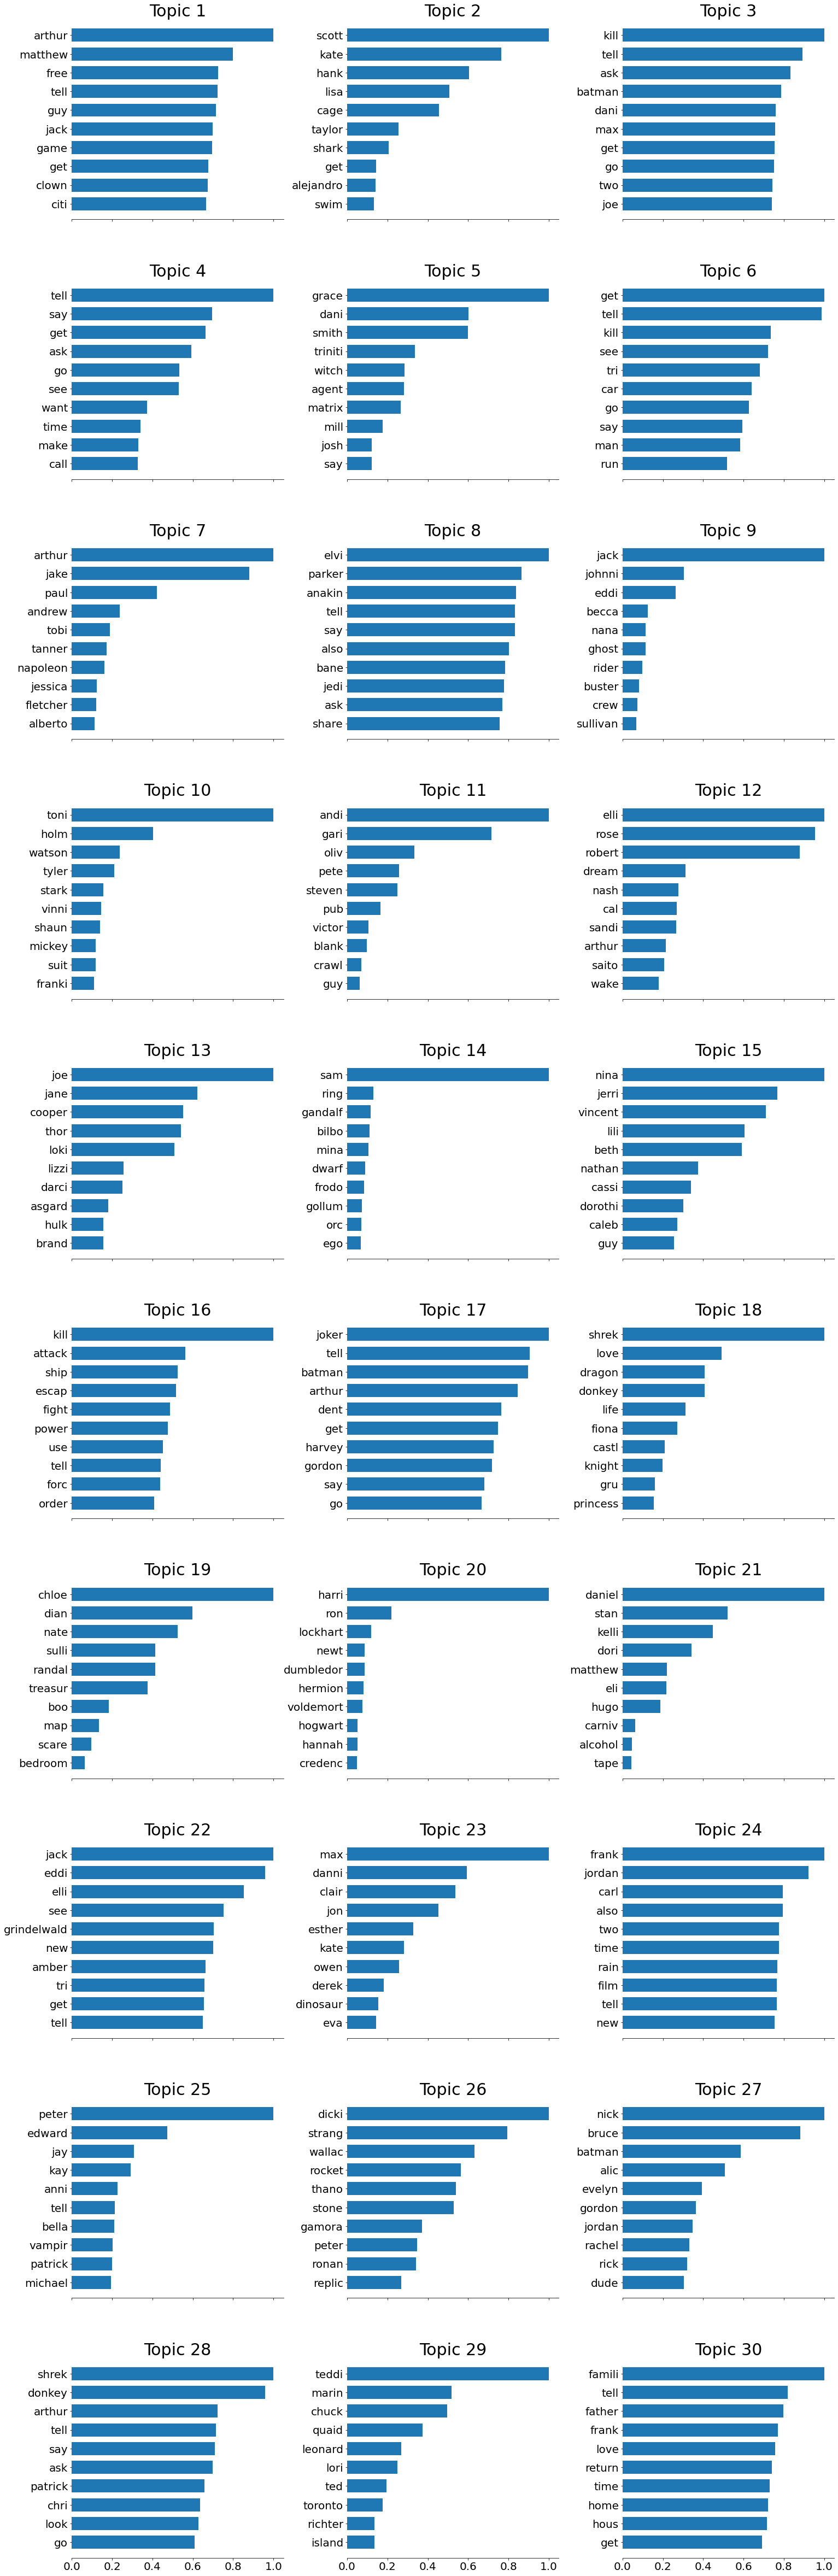

In [65]:
def plot_top_words(model, feature_names, n_top_words):
    fig, axes = plt.subplots(10, 3, figsize=(25, 30), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]
        
        ax = axes[topic_idx]
        ax.barh(top_features, weights/max(weights), height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
    

    plt.subplots_adjust(top=2.2, bottom=0.05, wspace=0.3, hspace=0.3)
    plt.show()
    
    
plot_top_words(lda, tf_feature_names, 10)